In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
#Read the data
df = pd.read_csv('/Users/ashishkumar/Downloads/AirPassengers.csv')

In [18]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [9]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [15]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [20]:
df.Month=pd.to_datetime(df.Month)

In [21]:
df_ts=df.set_index("Month")

In [22]:
type(df_ts)

pandas.core.frame.DataFrame

In [23]:
df.columns

Index(['Month', '#Passengers'], dtype='object')

In [24]:
df_ts.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

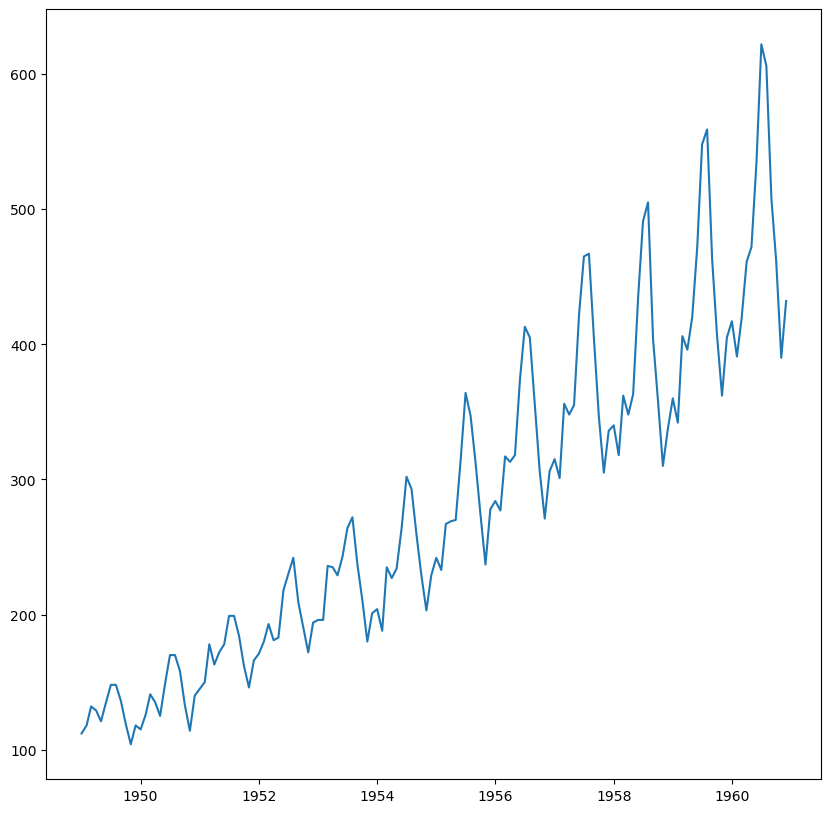

In [26]:
plt.figure(figsize=(10,10))
plt.plot(df_ts)

In [27]:
decomposition = seasonal_decompose(df_ts)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

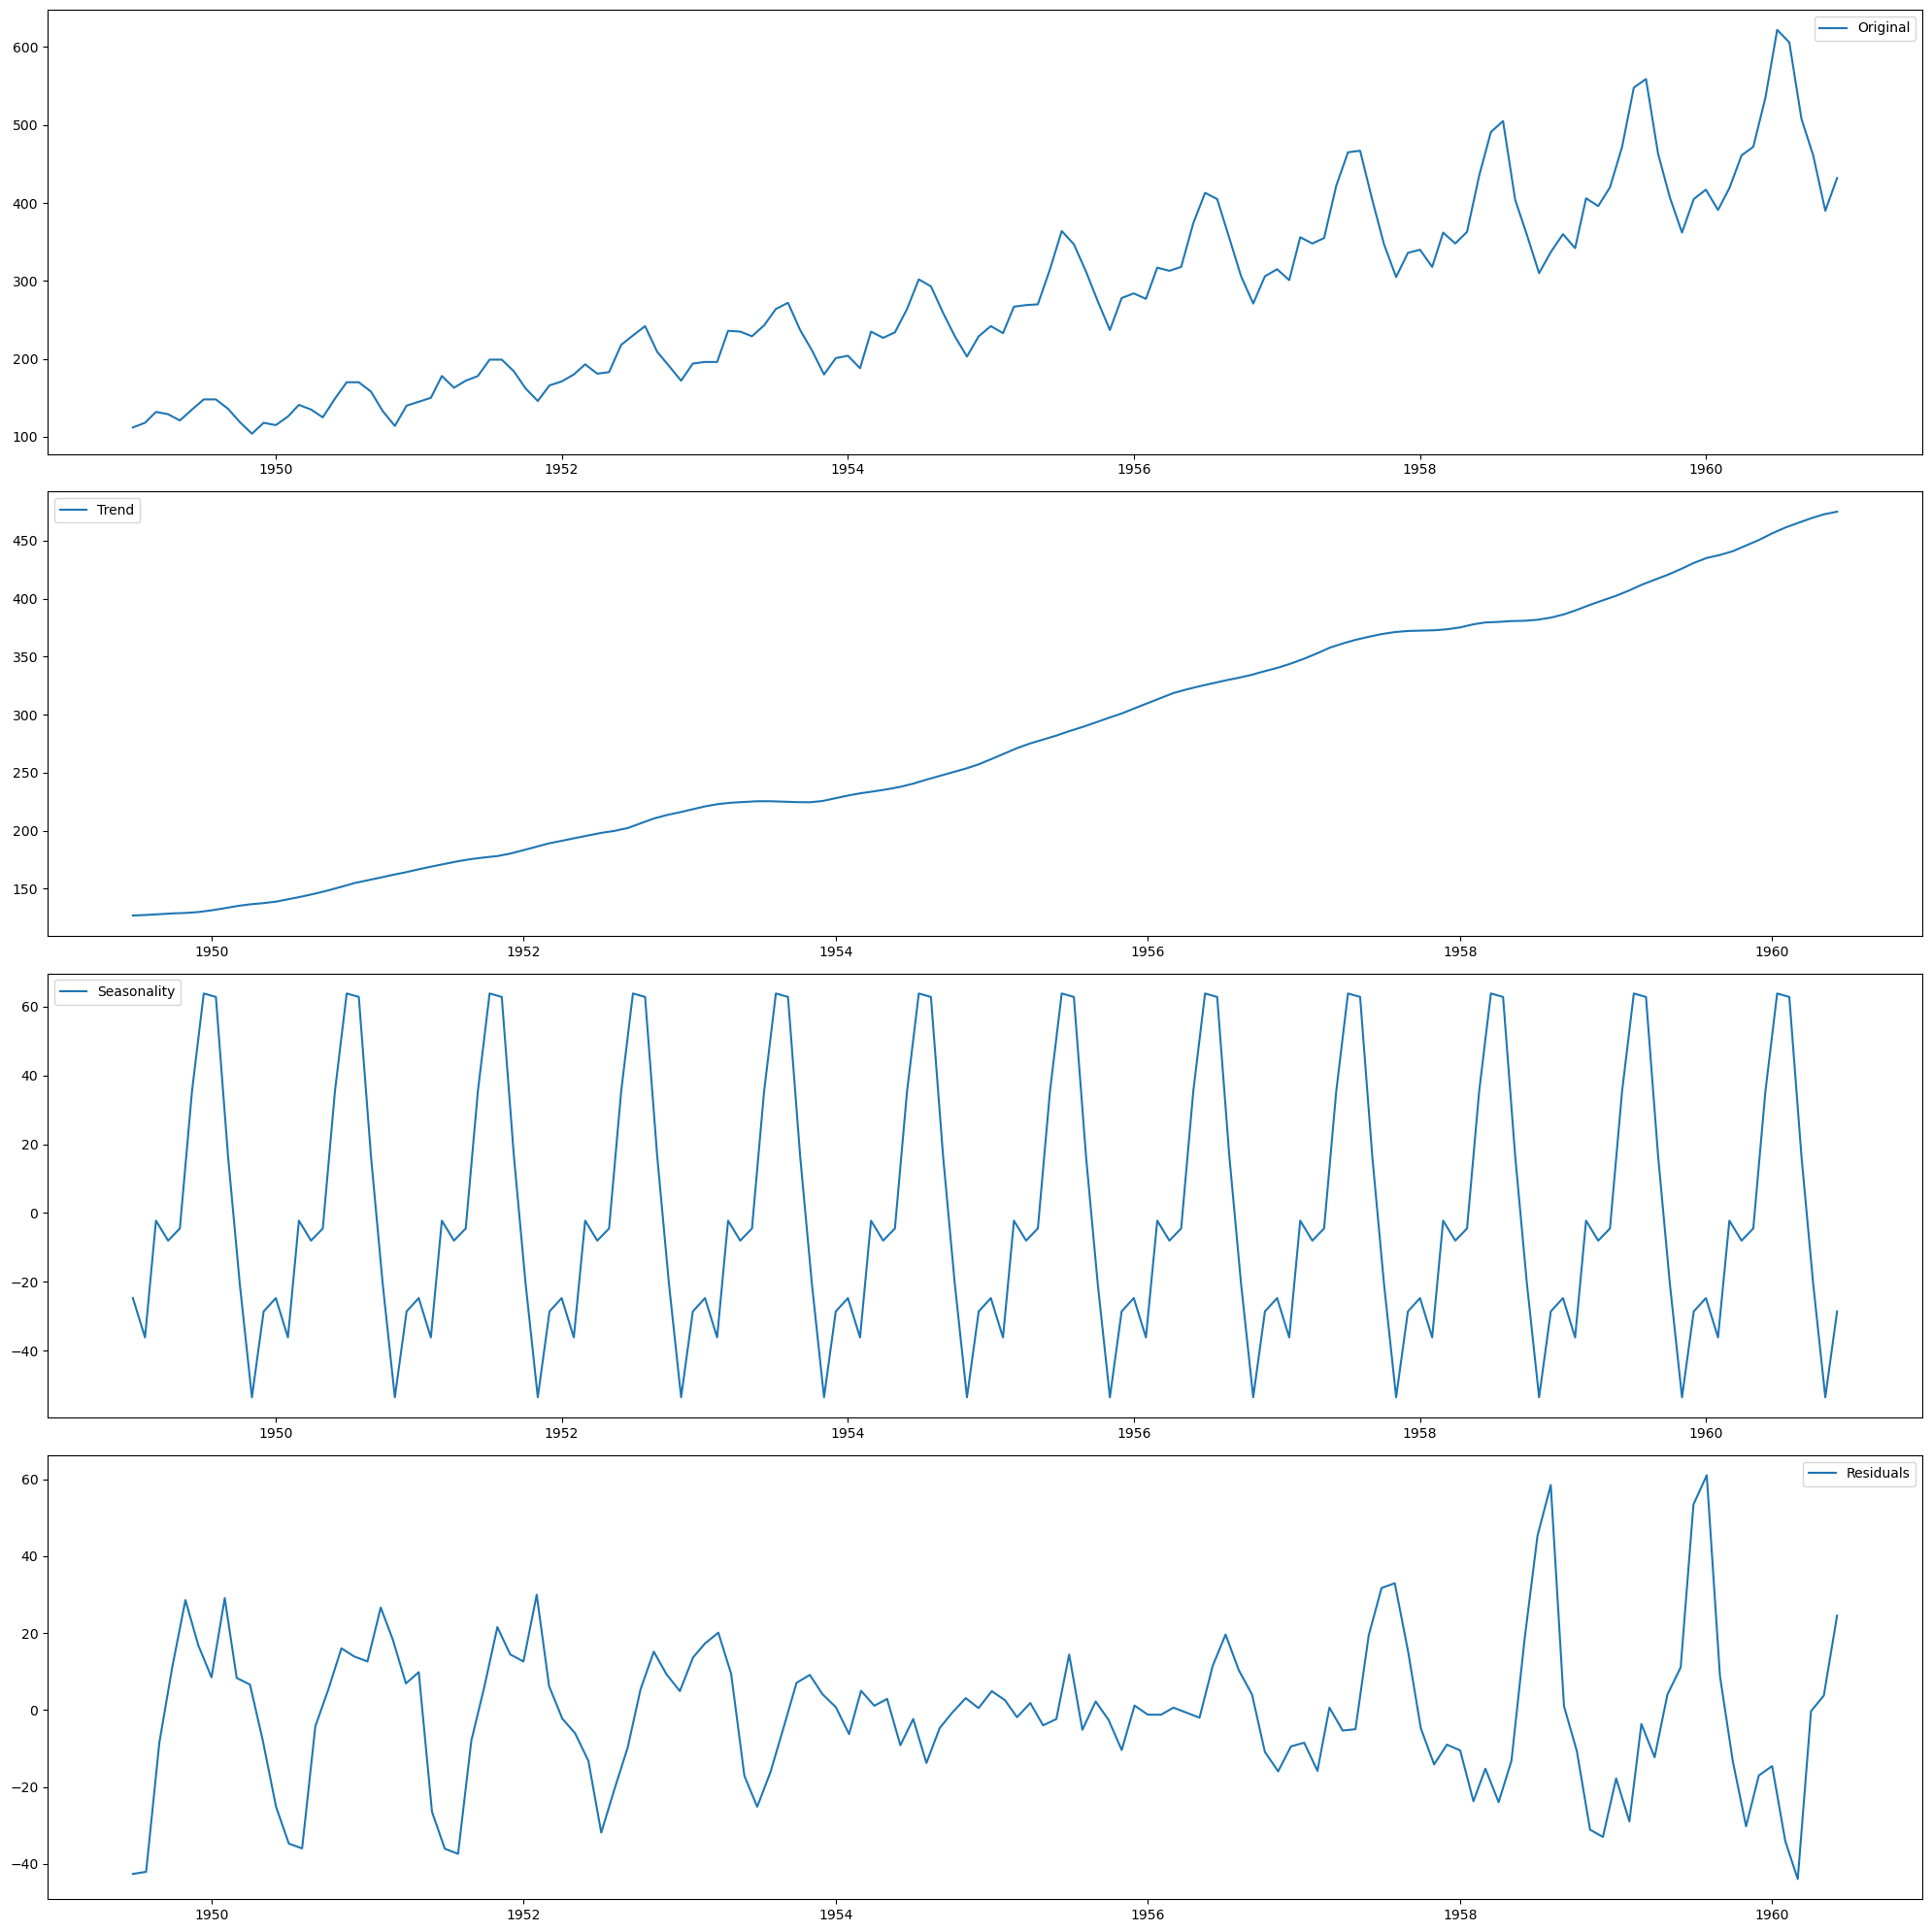

In [28]:
plt.figure(figsize=(20,20))

plt.subplot(411)
plt.plot(df_ts, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')


plt.tight_layout()

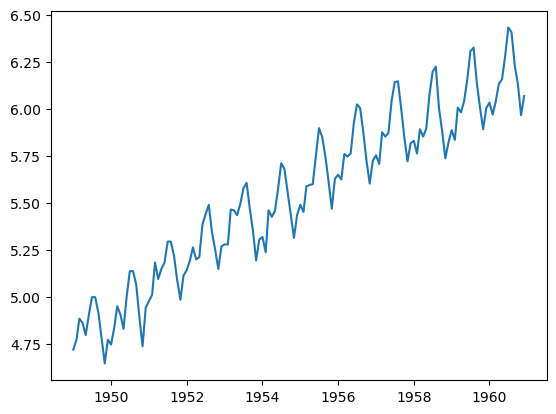

In [30]:
ts_log = np.log(df_ts)
plt.plot(ts_log)

In [31]:
ts_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [32]:
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

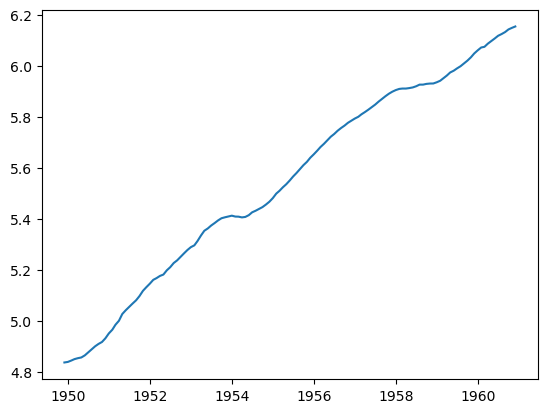

In [33]:
plt.plot(ts_log.rolling(12).mean())

In [34]:
residual.head(100)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1956-12-01   -0.008792
1957-01-01   -0.004277
1957-02-01   -0.032018
1957-03-01   -0.008046
1957-04-01   -0.010242
Name: resid, Length: 100, dtype: float64

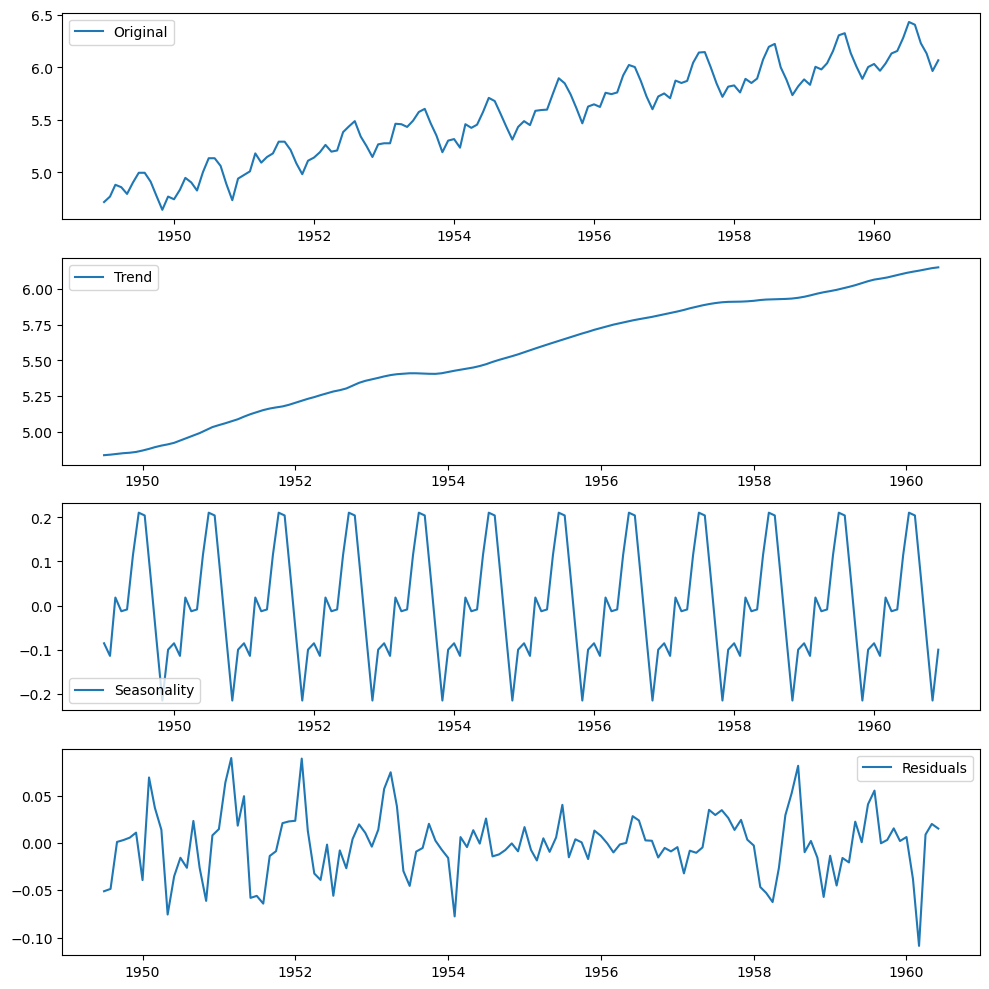

In [35]:
plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

In [37]:
df_ts

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [38]:
pd.concat([df_ts["#Passengers"],df_ts.shift(1)["#Passengers"],df_ts.shift(12)["#Passengers"]],axis=1)

,#Passengers,#Passengers,#Passengers
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,NaN
1949-03-01,132,118.0,NaN
1949-04-01,129,132.0,NaN
1949-05-01,121,129.0,NaN
...,...,...,...
1960-08-01,606,622.0,559.0
1960-09-01,508,606.0,463.0
1960-10-01,461,508.0,407.0


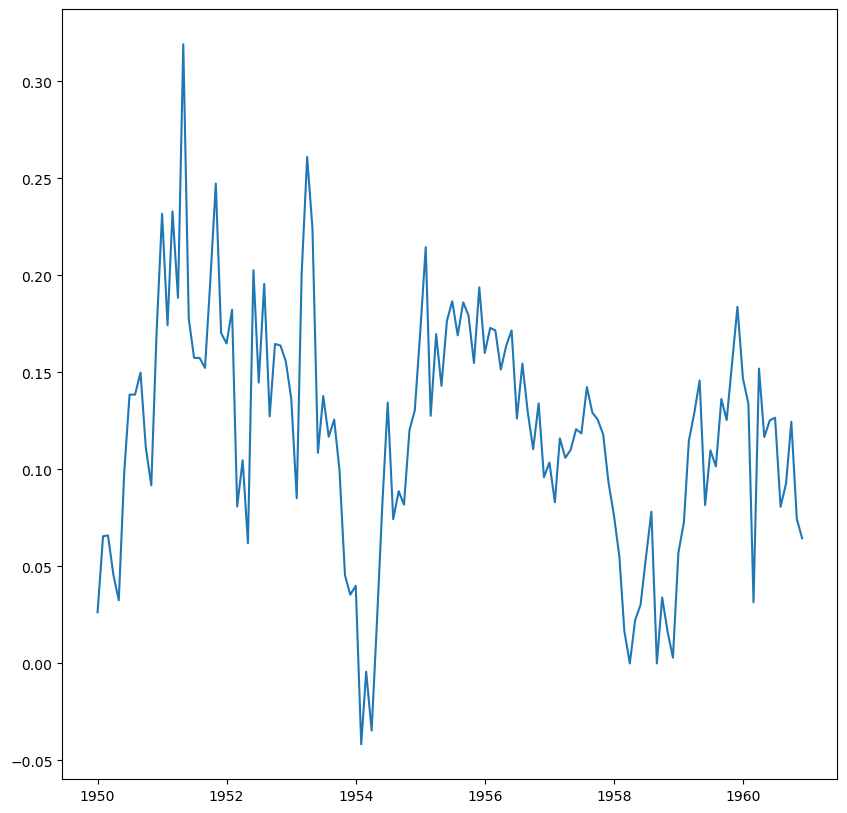

In [39]:
plt.figure(figsize=(10,10))
plt.plot(np.log(df_ts["#Passengers"]) - np.log(df_ts.shift(12)["#Passengers"]))

In [40]:
ts_log_diff = np.log(df_ts["#Passengers"]) - np.log(df_ts.shift(12)["#Passengers"])

In [41]:
ts_log_diff.dropna(inplace=True)

In [42]:
ts_log_diff

Month
1950-01-01    0.026433
1950-02-01    0.065597
1950-03-01    0.065958
1950-04-01    0.045462
1950-05-01    0.032523
                ...   
1960-08-01    0.080731
1960-09-01    0.092754
1960-10-01    0.124585
1960-11-01    0.074503
1960-12-01    0.064539
Name: #Passengers, Length: 132, dtype: float64

In [43]:
pd.concat([df_ts["#Passengers"],df_ts["#Passengers"].rolling(window=3).mean()],axis=1)

,#Passengers,#Passengers
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,120.666667
1949-04-01,129,126.333333
1949-05-01,121,127.333333
...,...,...
1960-08-01,606,587.666667
1960-09-01,508,578.666667
1960-10-01,461,525.000000


In [44]:
ts_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


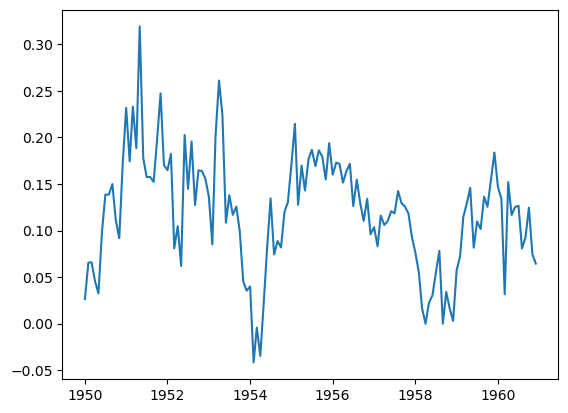

In [46]:
ts_log_diff = ts_log["#Passengers"] - ts_log["#Passengers"].shift(12)

plt.plot(ts_log_diff)

In [47]:
pd.concat([ts_log["#Passengers"] , ts_log["#Passengers"].shift(2)],axis=1)

,#Passengers,#Passengers
Month,,
1949-01-01,4.718499,NaN
1949-02-01,4.770685,NaN
1949-03-01,4.882802,4.718499
1949-04-01,4.859812,4.770685
1949-05-01,4.795791,4.882802
...,...,...
1960-08-01,6.406880,6.282267
1960-09-01,6.230481,6.432940
1960-10-01,6.133398,6.406880


In [48]:
ts_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [49]:
from datetime import datetime

datetime(1949,4,7)

datetime.datetime(1949, 4, 7, 0, 0)

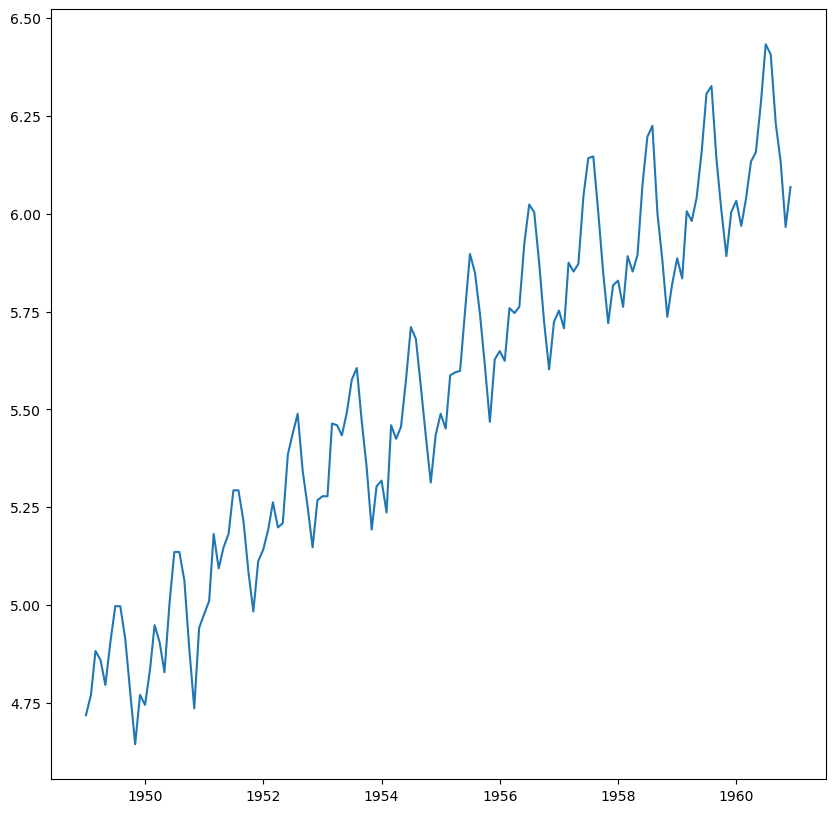

In [50]:
plt.figure(figsize=(10,10))

plt.plot(ts_log)

In [51]:
from statsmodels.tsa.stattools import adfuller

In [52]:
ts_log_diff

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    0.080731
1960-09-01    0.092754
1960-10-01    0.124585
1960-11-01    0.074503
1960-12-01    0.064539
Name: #Passengers, Length: 144, dtype: float64

In [53]:
ma = ts_log_diff.rolling(window=12).mean()
ms= ts_log_diff.rolling(window=12).std()

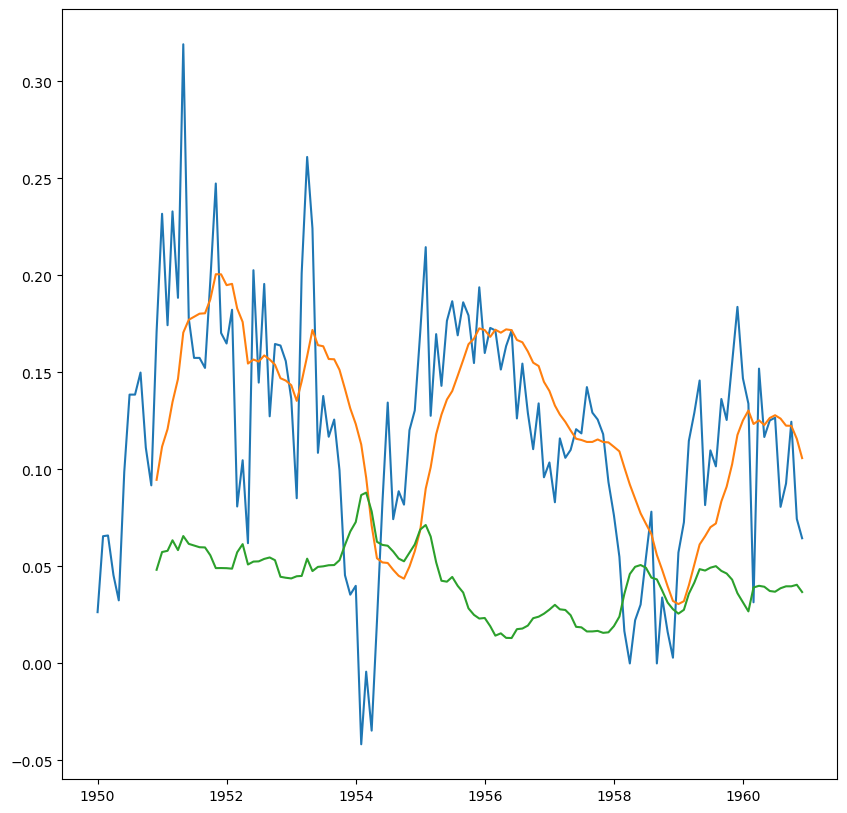

In [54]:
plt.figure(figsize=(10,10))
plt.plot(ts_log_diff)
plt.plot(ma)
plt.plot(ms)

In [55]:
ts_log_diff.dropna(inplace=True)
adfuller(ts_log_diff, autolag='AIC')

(-2.709576818988576,
 0.07239567181769366,
 12,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -424.76083484995365)